# Gruppierungen

In [25]:
########################################################
#--------------- benötigten Librarys ------------------#
########################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

## Daten einlesen
Dieser Teil liest die CSV-Datei ein.

In [23]:
# Daten einlesen
df = pd.read_csv('/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data/processed_data/ttr_entwicklung_ohne_nall_erweitert.csv')

## Spielhäufigkeitsanalyse und QTTR-Stabilität

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_94220/513538798.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Aktivitätskategorie')['Max_Abs_Change'].mean()


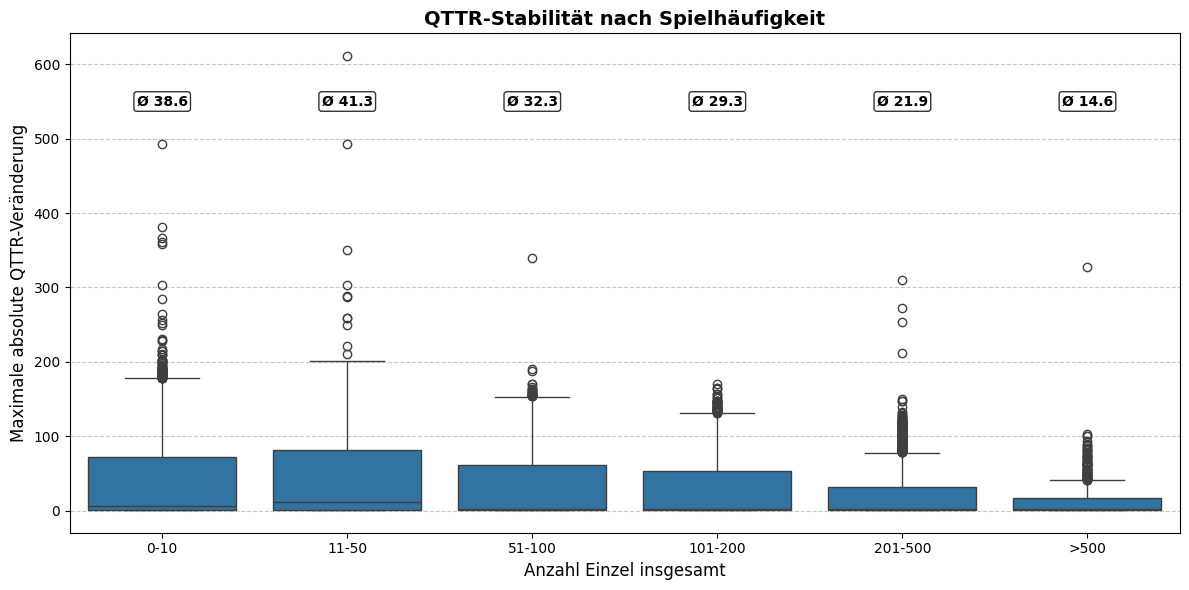


Einfluss der Spielhäufigkeit auf QTTR-Stabilität:
                     Mittelwert  Median  Standardabweichung  Anzahl Spieler
Aktivitätskategorie                                                        
0-10                  38.619615     6.0           51.166720           12419
11-50                 41.291557    12.0           49.902162           12200
51-100                32.296712     3.0           43.735974            3923
101-200               29.258579     3.0           40.385131            2885
201-500               21.860974     2.0           33.810805            2424
>500                  14.645833     2.0           25.826702             528

ANOVA-Test für Unterschiede zwischen Aktivitätskategorien:
F-Wert: 116.73, p-Wert: 0.000000
Signifikanter Unterschied: JA


/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_94220/513538798.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_stats = df.groupby('Aktivitätskategorie')['Max_Abs_Change'].agg(['mean', 'median', 'std', 'count'])


In [26]:
# Berechne die größte absolute Veränderung für jeden Spieler
diff_columns = [col for col in df.columns if col.startswith('Q-TTR_dif')]
df['Max_Abs_Change'] = df[diff_columns].abs().max(axis=1)

# Fokus auf Spielhäufigkeit
if 'Anzahl Einzel gesamt' in df.columns:
    
    # Kategorisiere Spieler nach Aktivitätsniveau
    activity_bins = [0, 10, 50, 100, 200, 500, 10000]
    activity_labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '>500']
    df['Aktivitätskategorie'] = pd.cut(df['Anzahl Einzel gesamt'], bins=activity_bins, labels=activity_labels)
    
    # QTTR-Stabilität nach Spielhäufigkeit
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Aktivitätskategorie', y='Max_Abs_Change', data=df)
    plt.title('QTTR-Stabilität nach Spielhäufigkeit', fontsize=14, fontweight='bold')
    plt.xlabel('Anzahl Einzel insgesamt', fontsize=12)
    plt.ylabel('Maximale absolute QTTR-Veränderung', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Füge Mittelwerte über den Boxplots hinzu
    means = df.groupby('Aktivitätskategorie')['Max_Abs_Change'].mean()
    for i, mean_val in enumerate(means):
        plt.text(i, df['Max_Abs_Change'].max() * 0.9, f'Ø {mean_val:.1f}', 
                 ha='center', va='center', fontweight='bold', 
                 bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2'))
    
    plt.tight_layout()
    plt.savefig('qttr_stabilitaet_nach_spielhaeufigkeit.png', dpi=300)
    plt.show()
    
    # Statistische Analyse
    print("\nEinfluss der Spielhäufigkeit auf QTTR-Stabilität:")
    activity_stats = df.groupby('Aktivitätskategorie')['Max_Abs_Change'].agg(['mean', 'median', 'std', 'count'])
    activity_stats.columns = ['Mittelwert', 'Median', 'Standardabweichung', 'Anzahl Spieler']
    print(activity_stats)
    
    # ANOVA-Test für Unterschiede zwischen Aktivitätskategorien
    categories = df['Aktivitätskategorie'].dropna().unique()
    anova_data = [df[df['Aktivitätskategorie'] == cat]['Max_Abs_Change'].dropna() for cat in categories]
    anova_result = stats.f_oneway(*anova_data)
    print(f"\nANOVA-Test für Unterschiede zwischen Aktivitätskategorien:")
    print(f"F-Wert: {anova_result.statistic:.2f}, p-Wert: {anova_result.pvalue:.6f}")
    print(f"Signifikanter Unterschied: {'JA' if anova_result.pvalue < 0.05 else 'NEIN'}")

## Geschlechterspezifische Analyse der QTTR-Volatilität

Gefundene QTTR-Differenzspalten: ['Q-TTR_dif_24_Q1-25_Q1', 'Q-TTR_dif_24_Q1-24_Q3', 'Q-TTR_dif_24_Q1-24_Q2', 'Q-TTR_dif_24_Q2-24_Q3', 'Q-TTR_dif_24_Q3-24_Q4', 'Q-TTR_dif_24_Q4-25_Q1']

Erste 5 Zeilen mit Max_Abs_Change:
  Nachname   Vorname  Q-TTR_dif_24_Q1-25_Q1  Q-TTR_dif_24_Q1-24_Q3  Q-TTR_dif_24_Q1-24_Q2  Q-TTR_dif_24_Q2-24_Q3  \
0      Fan  Zhendong                   34.0                   34.0                    0.0                   34.0   
1     Wang    Chuqin                   64.0                   64.0                    0.0                   64.0   
2      Lin   Gaoyuan                   22.0                   22.0                    0.0                   22.0   
3   Lebrun     Felix                  112.0                  112.0                    0.0                  112.0   
4    Liang   Jingkun                   34.0                   34.0                    0.0                   34.0   

   Q-TTR_dif_24_Q3-24_Q4  Q-TTR_dif_24_Q4-25_Q1  Max_Abs_Change  
0                

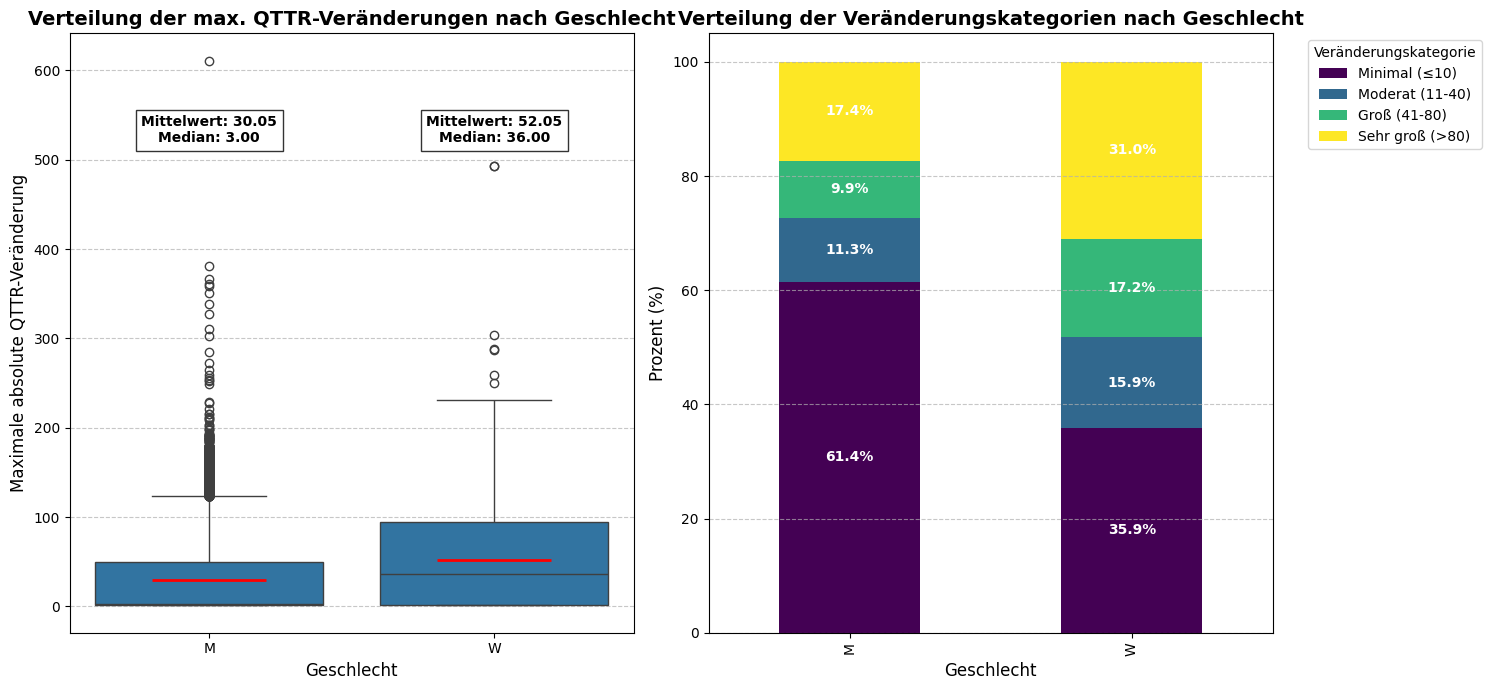


Geschlechterunterschiede in der QTTR-Volatilität:
Männer (n=24281): Mittlere max. Veränderung = 30.05
Frauen (n=10098): Mittlere max. Veränderung = 52.05
Differenz: 22.01 Punkte
T-Test: t=-37.24, p=0.0000
Signifikanter Unterschied: JA
Geschlechtsunterschiede-Statistik gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_geschlechtsunterschiede_statistik.csv


In [56]:
# Definiere den Pfad für die Speicherung der Grafiken
output_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai'

# Stelle sicher, dass der Ordner existiert
os.makedirs(output_path, exist_ok=True)

# Annahme: df enthält deine Daten

# 1. Identifiziere die Spalten mit QTTR-Differenzen
diff_columns = [col for col in df.columns if col.startswith('Q-TTR_dif')]
print(f"Gefundene QTTR-Differenzspalten: {diff_columns}")

# 2. Erstelle Max_Abs_Change-Spalte als die größte absolute Veränderung für jeden Spieler
df['Max_Abs_Change'] = df[diff_columns].abs().max(axis=1)

# Zeige erste 5 Zeilen mit der neuen Spalte an
print("\nErste 5 Zeilen mit Max_Abs_Change:")
print(df[['Nachname', 'Vorname'] + diff_columns + ['Max_Abs_Change']].head())

# 3. Bestimme, in welchem Quartal die maximale Veränderung auftrat
# Erstelle Hilfsspalten für die spätere Analyse
df['Biggest_Change_Col'] = ''  # Spaltenname mit der größten Veränderung
df['Biggest_Change_Value'] = 0.0  # Wert der größten Veränderung (mit Vorzeichen)

for col in diff_columns:
    mask = df[col].abs() == df['Max_Abs_Change']
    df.loc[mask, 'Biggest_Change_Col'] = col
    df.loc[mask, 'Biggest_Change_Value'] = df.loc[mask, col]

# 4. Definiere die Richtung der Veränderung (Verbesserung oder Verschlechterung)
df['Change_Direction'] = np.sign(df['Biggest_Change_Value'])
df['Change_Type'] = 'Stabil'
df.loc[df['Change_Direction'] > 0, 'Change_Type'] = 'Verbesserung'
df.loc[df['Change_Direction'] < 0, 'Change_Type'] = 'Verschlechterung'

# Jetzt die geschlechterspezifische Analyse
if 'Geschlecht' in df.columns:
    plt.figure(figsize=(15, 7))
    
    # 1. Boxplot der QTTR-Veränderungen nach Geschlecht
    plt.subplot(1, 2, 1)
    
    # Verwende Seaborn für einen schöneren Boxplot mit Outliers
    sns.boxplot(x='Geschlecht', y='Max_Abs_Change', data=df)
    
    # Füge Mittelwertlinien hinzu
    means = df.groupby('Geschlecht')['Max_Abs_Change'].mean()
    for i, gender in enumerate(means.index):
        plt.hlines(y=means[gender], xmin=i-0.2, xmax=i+0.2, color='red', linestyle='-', linewidth=2)
    
    plt.title('Verteilung der max. QTTR-Veränderungen nach Geschlecht', fontsize=14, fontweight='bold')
    plt.xlabel('Geschlecht', fontsize=12)
    plt.ylabel('Maximale absolute QTTR-Veränderung', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Füge Statistiken zum Plot hinzu
    male_mean = df[df['Geschlecht'] == 'M']['Max_Abs_Change'].mean()
    female_mean = df[df['Geschlecht'] == 'W']['Max_Abs_Change'].mean()
    male_median = df[df['Geschlecht'] == 'M']['Max_Abs_Change'].median()
    female_median = df[df['Geschlecht'] == 'W']['Max_Abs_Change'].median()
    
    plt.text(0, df['Max_Abs_Change'].max() * 0.9, f'Mittelwert: {male_mean:.2f}\nMedian: {male_median:.2f}',
            ha='center', va='top', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))
    plt.text(1, df['Max_Abs_Change'].max() * 0.9, f'Mittelwert: {female_mean:.2f}\nMedian: {female_median:.2f}',
            ha='center', va='top', fontweight='bold', bbox=dict(facecolor='white', alpha=0.8))
    
    # 2. Verteilung der Veränderungskategorien nach Geschlecht
    plt.subplot(1, 2, 2)
    
    # Definiere Kategorien für QTTR-Veränderungen
    threshold_small = 10
    threshold_medium = 40
    threshold_large = 80
    
    # Erstelle Veränderungskategorien
    def categorize_change(value):
        if value <= threshold_small:
            return "Minimal (≤10)"
        elif value <= threshold_medium:
            return "Moderat (11-40)"
        elif value <= threshold_large:
            return "Groß (41-80)"
        else:
            return "Sehr groß (>80)"
    
    # Füge Kategorie-Spalte hinzu
    df['Change_Category'] = df['Max_Abs_Change'].apply(categorize_change)
    
    # Kreuztabelle für Veränderungskategorien nach Geschlecht
    gender_change_cross = pd.crosstab(df['Geschlecht'], df['Change_Category'], normalize='index') * 100
    
    # Sortiere Kategorien nach Größe
    category_order = ["Minimal (≤10)", "Moderat (11-40)", "Groß (41-80)", "Sehr groß (>80)"]
    if set(category_order).issubset(set(gender_change_cross.columns)):
        gender_change_cross = gender_change_cross[category_order]
    
    # Plotte gestapeltes Balkendiagramm
    gender_change_cross.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
    plt.title('Verteilung der Veränderungskategorien nach Geschlecht', fontsize=14, fontweight='bold')
    plt.xlabel('Geschlecht', fontsize=12)
    plt.ylabel('Prozent (%)', fontsize=12)
    plt.legend(title='Veränderungskategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Füge Prozentsätze hinzu
    for i, gender in enumerate(gender_change_cross.index):
        cumsum = 0
        for j, category in enumerate(gender_change_cross.columns):
            value = gender_change_cross.loc[gender, category]
            if value > 5:  # Zeige nur Werte >5% an, um Überlastung zu vermeiden
                plt.text(i, cumsum + value/2, f'{value:.1f}%', 
                         ha='center', va='center', fontweight='bold', 
                         color='white')
            cumsum += value
    
    plt.tight_layout()
    gender_plot_path = os.path.join(output_path, 'qttr_veraenderungen_nach_geschlecht.png')
    plt.savefig(gender_plot_path, dpi=300)
    print(f"Geschlechterspezifische Analyse gespeichert unter: {gender_plot_path}")
    plt.show()
    
    # T-Test für Geschlechterunterschiede
    male_changes = df[df['Geschlecht'] == 'M']['Max_Abs_Change'].dropna()
    female_changes = df[df['Geschlecht'] == 'W']['Max_Abs_Change'].dropna()
    
    if len(male_changes) > 0 and len(female_changes) > 0:
        t_stat, p_val = stats.ttest_ind(male_changes, female_changes, equal_var=False)
        print("\nGeschlechterunterschiede in der QTTR-Volatilität:")
        print(f"Männer (n={len(male_changes)}): Mittlere max. Veränderung = {male_changes.mean():.2f}")
        print(f"Frauen (n={len(female_changes)}): Mittlere max. Veränderung = {female_changes.mean():.2f}")
        print(f"Differenz: {female_changes.mean() - male_changes.mean():.2f} Punkte")
        print(f"T-Test: t={t_stat:.2f}, p={p_val:.4f}")
        print(f"Signifikanter Unterschied: {'JA' if p_val < 0.05 else 'NEIN'}")
        
        # Speichere die Statistiken in einer CSV-Datei
        gender_stats = pd.DataFrame({
            'Statistik': ['Anzahl', 'Mittelwert', 'Median', 'Standardabweichung', 
                         'Minimum', 'Maximum', '25% Perzentil', '75% Perzentil'],
            'Männer': [len(male_changes), male_changes.mean(), male_changes.median(), 
                      male_changes.std(), male_changes.min(), male_changes.max(),
                      male_changes.quantile(0.25), male_changes.quantile(0.75)],
            'Frauen': [len(female_changes), female_changes.mean(), female_changes.median(), 
                      female_changes.std(), female_changes.min(), female_changes.max(),
                      female_changes.quantile(0.25), female_changes.quantile(0.75)]
        })
        
        # Füge T-Test-Ergebnisse hinzu
        gender_stats = pd.concat([gender_stats, pd.DataFrame({
            'Statistik': ['T-Test (t-Wert)'], 
            'Männer': [t_stat], 
            'Frauen': [np.nan]
        })], ignore_index=True)
        
        gender_stats = pd.concat([gender_stats, pd.DataFrame({
            'Statistik': ['p-Wert'], 
            'Männer': [p_val], 
            'Frauen': [np.nan]
        })], ignore_index=True)
        
        # Speichere die Statistiken
        gender_stats_path = os.path.join(output_path, 'qttr_geschlechtsunterschiede_statistik.csv')
        gender_stats.to_csv(gender_stats_path, index=False)
        print(f"Geschlechtsunterschiede-Statistik gespeichert unter: {gender_stats_path}")
else:
    print("Keine Geschlechtsinformation verfügbar für die Analyse.")

## Analyse der TTR-Verbesserungen vs. Verschlechterungen

Erste Zeilen der geladenen Daten:
   Unnamed: 0  Nachname      Vorname               Zeitraum  QTTR-Veränderung  QTTR-Veränderung (absolut)
0        1868    Ulrich  Numa Marlon  Q-TTR_dif_24_Q1-25_Q1            -611.0                       611.0
1       11447  Petersen        Mieke  Q-TTR_dif_24_Q1-25_Q1             493.0                       493.0
2        1719       Kim       Haneul  Q-TTR_dif_24_Q1-25_Q1             493.0                       493.0
3        9411  Wichmann       Daniel  Q-TTR_dif_24_Q1-25_Q1             381.0                       381.0
4       11323    Klinge          Sam  Q-TTR_dif_24_Q1-25_Q1             366.0                       366.0

Anzahl fehlender Werte pro Spalte:
Unnamed: 0                    0
Nachname                      0
Vorname                       0
Zeitraum                      0
QTTR-Veränderung              0
QTTR-Veränderung (absolut)    0
dtype: int64


/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_94220/3345393394.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True,


Grafik gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_verbesserungen_vs_verschlechterungen.png


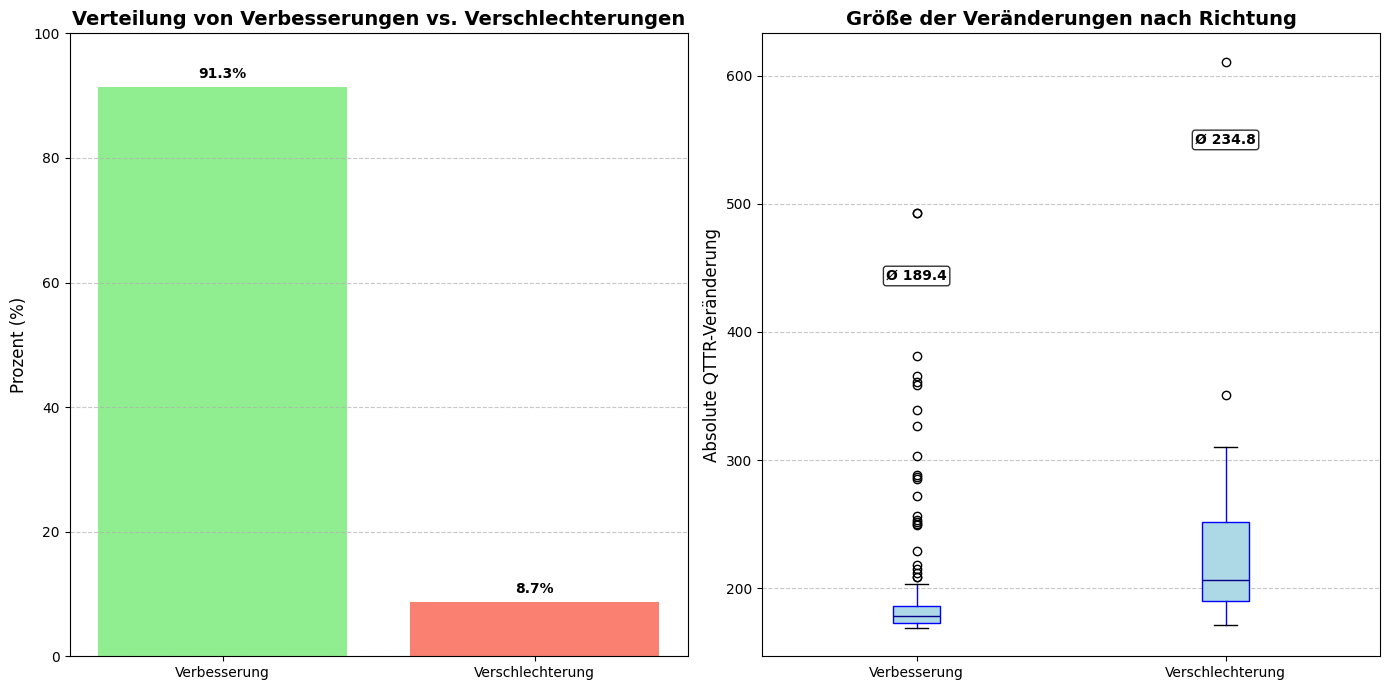


Vergleich von Verbesserungen und Verschlechterungen:
Verbesserungen (n=274): Mittlere absolute Änderung = 189.41
Verschlechterungen (n=26): Mittlere absolute Änderung = 234.81
T-Test: t=-2.56, p=0.0167
Signifikanter Unterschied: JA
Statistik gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/verbesserung_verschlechterung_statistik.csv
Zeitraum-Analyse gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_veraenderungen_nach_zeitraum.png


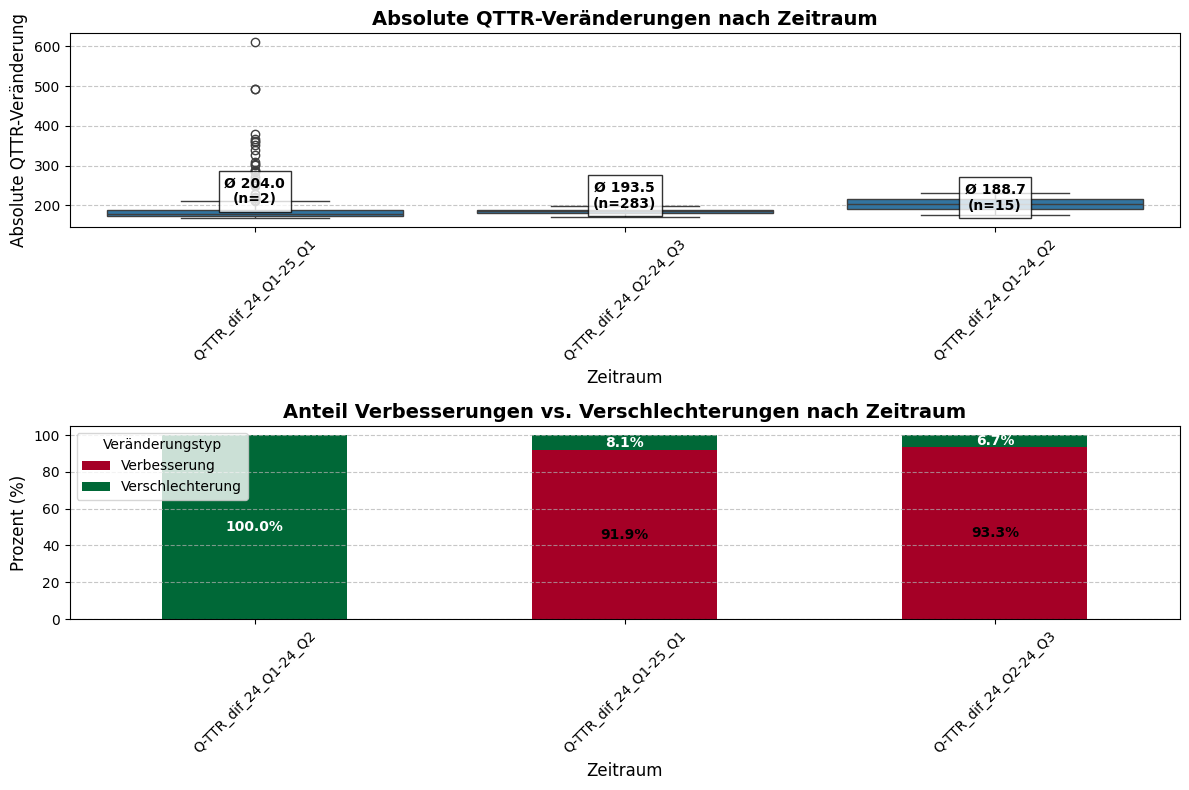


ANOVA-Test für Unterschiede zwischen Zeiträumen:
F-Wert: 0.1171
p-Wert: 0.8895
Signifikante Unterschiede zwischen Zeiträumen: NEIN


In [57]:
# Definiere den Pfad für die Speicherung der Grafiken
output_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai'
os.makedirs(output_path, exist_ok=True)

# Lade die neue CSV-Datei mit den QTTR-Veränderungen
csv_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/300_größten_änderungen.csv'
df_changes = pd.read_csv(csv_path)

# Zeige die ersten Zeilen der Daten
print("Erste Zeilen der geladenen Daten:")
print(df_changes.head())

# Prüfe auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df_changes.isnull().sum())

# Klassifiziere als Verbesserung oder Verschlechterung basierend auf der QTTR-Veränderung
df_changes['Change_Type'] = 'Stabil'
df_changes.loc[df_changes['QTTR-Veränderung'] > 0, 'Change_Type'] = 'Verbesserung'
df_changes.loc[df_changes['QTTR-Veränderung'] < 0, 'Change_Type'] = 'Verschlechterung'

# Visualisiere die Verteilung
plt.figure(figsize=(14, 7))

# Anteil Verbesserungen vs. Verschlechterungen als Balkendiagramm statt Kuchendiagramm
plt.subplot(1, 2, 1)
direction_counts = df_changes['Change_Type'].value_counts(normalize=True) * 100  # In Prozent

# Sortiere, damit Verbesserung zuerst kommt 
if 'Stabil' in direction_counts.index:
    # Wenn "Stabil" vorhanden ist, entferne es
    direction_counts = direction_counts[direction_counts.index != 'Stabil']
    # Normalisiere erneut auf 100%
    direction_counts = direction_counts / direction_counts.sum() * 100

# Definiere Farben für Balken
colors = {'Verbesserung': 'lightgreen', 'Verschlechterung': 'salmon'}
bar_colors = [colors.get(idx, 'lightblue') for idx in direction_counts.index]

# Erstelle das Balkendiagramm
bars = plt.bar(direction_counts.index, direction_counts.values, color=bar_colors)
plt.title('Verteilung von Verbesserungen vs. Verschlechterungen', fontsize=14, fontweight='bold')
plt.ylabel('Prozent (%)', fontsize=12)
plt.ylim(0, 100)  # Y-Achse von 0 bis 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Füge Prozentangaben über den Balken hinzu
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Größe der Veränderungen nach Richtung
plt.subplot(1, 2, 2)
improvement = df_changes[df_changes['Change_Type'] == 'Verbesserung']['QTTR-Veränderung (absolut)']
deterioration = df_changes[df_changes['Change_Type'] == 'Verschlechterung']['QTTR-Veränderung (absolut)']

data = [improvement, deterioration]
labels = ['Verbesserung', 'Verschlechterung']

plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            medianprops=dict(color='darkblue'))
plt.title('Größe der Veränderungen nach Richtung', fontsize=14, fontweight='bold')
plt.ylabel('Absolute QTTR-Veränderung', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Füge Mittelwerte hinzu
for i, d in enumerate([improvement, deterioration]):
    if len(d) > 0:  # Prüfe, ob Daten vorhanden sind
        plt.text(i+1, d.max() * 0.9 if not d.empty else 0, f'Ø {d.mean():.1f}',
                ha='center', va='center', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2'))

plt.tight_layout()
savepath = os.path.join(output_path, 'qttr_verbesserungen_vs_verschlechterungen.png')
plt.savefig(savepath, dpi=300)
print(f"Grafik gespeichert unter: {savepath}")
plt.show()

# Statistische Tests
if len(improvement) > 0 and len(deterioration) > 0:
    t_stat, p_val = stats.ttest_ind(improvement, deterioration, equal_var=False)
    print("\nVergleich von Verbesserungen und Verschlechterungen:")
    print(f"Verbesserungen (n={len(improvement)}): Mittlere absolute Änderung = {improvement.mean():.2f}")
    print(f"Verschlechterungen (n={len(deterioration)}): Mittlere absolute Änderung = {deterioration.mean():.2f}")
    print(f"T-Test: t={t_stat:.2f}, p={p_val:.4f}")
    print(f"Signifikanter Unterschied: {'JA' if p_val < 0.05 else 'NEIN'}")
    
    # Speichere die Statistik als CSV
    stats_df = pd.DataFrame({
        'Kategorie': ['Verbesserungen', 'Verschlechterungen'],
        'Anzahl': [len(improvement), len(deterioration)],
        'Mittlere absolute Änderung': [improvement.mean(), deterioration.mean()],
        'Median absolute Änderung': [improvement.median(), deterioration.median()],
        'Standardabweichung': [improvement.std(), deterioration.std()],
        'Minimum': [improvement.min(), deterioration.min()],
        'Maximum': [improvement.max(), deterioration.max()]
    })
    
    stats_path = os.path.join(output_path, 'verbesserung_verschlechterung_statistik.csv')
    stats_df.to_csv(stats_path, index=False)
    print(f"Statistik gespeichert unter: {stats_path}")

# Zusätzliche Analyse: Verteilung der Veränderungen nach Zeitraum
if 'Zeitraum' in df_changes.columns:
    plt.figure(figsize=(12, 8))
    
    # Veränderungen nach Zeitraum (Boxplot)
    plt.subplot(2, 1, 1)
    sns.boxplot(x='Zeitraum', y='QTTR-Veränderung (absolut)', data=df_changes)
    plt.title('Absolute QTTR-Veränderungen nach Zeitraum', fontsize=14, fontweight='bold')
    plt.xlabel('Zeitraum', fontsize=12)
    plt.ylabel('Absolute QTTR-Veränderung', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    
    # Füge Mittelwerte hinzu
    means = df_changes.groupby('Zeitraum')['QTTR-Veränderung (absolut)'].mean()
    counts = df_changes.groupby('Zeitraum').size()
    
    for i, (period, mean) in enumerate(means.items()):
        plt.text(i, mean + 1, f'Ø {mean:.1f}\n(n={counts[period]})', 
                ha='center', fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.8))
    
    # Verbesserung vs. Verschlechterung nach Zeitraum (gestapelter Balkenplot)
    plt.subplot(2, 1, 2)
    
    # Kreuztabelle erstellen
    period_change_cross = pd.crosstab(df_changes['Zeitraum'], df_changes['Change_Type'], normalize='index') * 100
    
    # Falls 'Stabil' vorhanden ist, entferne es für eine klarere Darstellung
    if 'Stabil' in period_change_cross.columns:
        period_change_cross = period_change_cross[['Verbesserung', 'Verschlechterung']]
    
    # Plotte gestapeltes Balkendiagramm
    period_change_cross.plot(kind='bar', stacked=True, colormap='RdYlGn', ax=plt.gca())
    plt.title('Anteil Verbesserungen vs. Verschlechterungen nach Zeitraum', fontsize=14, fontweight='bold')
    plt.xlabel('Zeitraum', fontsize=12)
    plt.ylabel('Prozent (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Veränderungstyp')
    plt.xticks(rotation=45)
    
    # Füge Prozentsätze hinzu
    for i, period in enumerate(period_change_cross.index):
        for j, column in enumerate(period_change_cross.columns):
            # Berechne Position (je nachdem, ob gestapelt oder nicht)
            if j == 0:  # Erste Kategorie
                position = period_change_cross.loc[period, column] / 2
            else:  # Weitere Kategorien - finde Position in der Mitte des Segments
                previous_sum = period_change_cross.loc[period, :].iloc[:j].sum()
                current_val = period_change_cross.loc[period, column]
                position = previous_sum + current_val / 2
                
            if period_change_cross.loc[period, column] > 5:  # Nur anzeigen, wenn > 5%
                plt.text(i, position, f'{period_change_cross.loc[period, column]:.1f}%', 
                        ha='center', va='center', fontweight='bold',
                        color='black' if j == 0 else 'white')
    
    plt.tight_layout()
    zeitraum_path = os.path.join(output_path, 'qttr_veraenderungen_nach_zeitraum.png')
    plt.savefig(zeitraum_path, dpi=300)
    print(f"Zeitraum-Analyse gespeichert unter: {zeitraum_path}")
    plt.show()
    
    # ANOVA-Test für Unterschiede zwischen Zeiträumen
    from scipy.stats import f_oneway
    
    # Sammle Daten für jeden Zeitraum
    period_data = [df_changes[df_changes['Zeitraum'] == period]['QTTR-Veränderung (absolut)'].dropna() 
                 for period in df_changes['Zeitraum'].unique()]
    
    # Führe ANOVA durch
    if all(len(data) > 0 for data in period_data) and len(period_data) > 1:
        anova_result = f_oneway(*period_data)
        print("\nANOVA-Test für Unterschiede zwischen Zeiträumen:")
        print(f"F-Wert: {anova_result.statistic:.4f}")
        print(f"p-Wert: {anova_result.pvalue:.4f}")
        print(f"Signifikante Unterschiede zwischen Zeiträumen: {'JA' if anova_result.pvalue < 0.05 else 'NEIN'}")

## Kombination von Spielhäufigkeit, Spielstärke und Veränderungen

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_94220/3664975635.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='Max_Abs_Change',


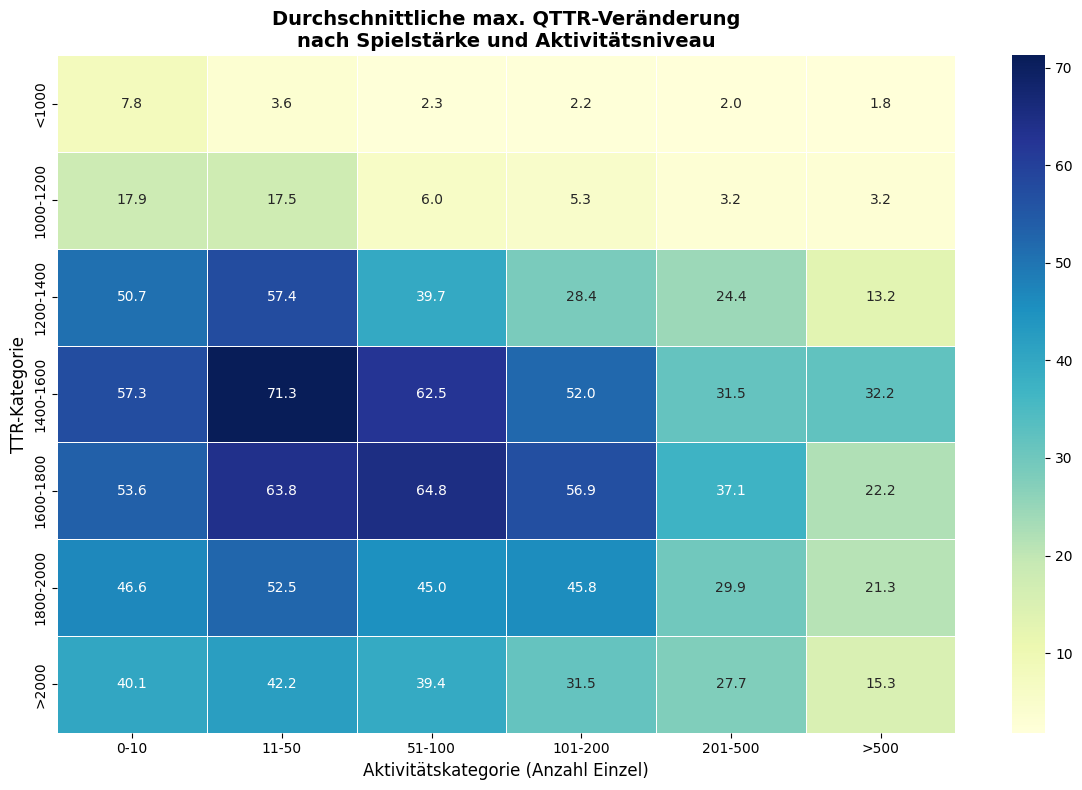

/var/folders/mh/m6ml4k8j6w55wxl7hvpbxks00000gn/T/ipykernel_94220/3664975635.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts_heatmap = df.pivot_table(values='Max_Abs_Change',



Anzahl Spieler nach Spielstärke und Aktivitätsniveau:
Aktivitätskategorie  0-10  11-50  51-100  101-200  201-500  >500
TTR_Kategorie                                                   
<1000                2462   2919    1257      872      642   144
1000-1200            1222   1192     362      240      149    32
1200-1400             984    995     260      189      130    18
1400-1600            1832   1736     504      364      335    35
1600-1800            2432   2198     654      501      455   110
1800-2000            2049   1743     468      402      415   112
>2000                1438   1417     418      317      298    77

Multiple Regression: Einfluss von TTR-Wert und Spielhäufigkeit auf QTTR-Veränderungen
                            OLS Regression Results                            
Dep. Variable:         Max_Abs_Change   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Square

In [44]:
# Heatmap: Kombination von Spielhäufigkeit, Spielstärke und QTTR-Veränderungen
if 'Anzahl Einzel gesamt' in df.columns and 'TTR_Q1_2024' in df.columns:
    # Erstelle Kategorien falls noch nicht vorhanden
    if 'Aktivitätskategorie' not in df.columns:
        activity_bins = [0, 10, 50, 100, 200, 500, 10000]
        activity_labels = ['0-10', '11-50', '51-100', '101-200', '201-500', '>500']
        df['Aktivitätskategorie'] = pd.cut(df['Anzahl Einzel gesamt'], bins=activity_bins, labels=activity_labels)
    
    if 'TTR_Kategorie' not in df.columns:
        ttr_bins = [0, 1000, 1200, 1400, 1600, 1800, 2000, 3000]
        ttr_labels = ['<1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000', '>2000']
        df['TTR_Kategorie'] = pd.cut(df['TTR_Q1_2024'], bins=ttr_bins, labels=ttr_labels)
    
    # Kreuztabelle für mittlere QTTR-Veränderung nach Aktivität und Spielstärke
    heatmap_data = df.pivot_table(values='Max_Abs_Change', 
                                 index='TTR_Kategorie', 
                                 columns='Aktivitätskategorie',
                                 aggfunc='mean')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
    plt.title('Durchschnittliche max. QTTR-Veränderung\nnach Spielstärke und Aktivitätsniveau', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Aktivitätskategorie (Anzahl Einzel)', fontsize=12)
    plt.ylabel('TTR-Kategorie', fontsize=12)
    plt.tight_layout()
    plt.savefig('qttr_veraenderung_heatmap.png', dpi=300)
    plt.show()
    
    # Kreuztabelle für Spielerzahlen
    counts_heatmap = df.pivot_table(values='Max_Abs_Change', 
                                   index='TTR_Kategorie', 
                                   columns='Aktivitätskategorie',
                                   aggfunc='count')
    
    print("\nAnzahl Spieler nach Spielstärke und Aktivitätsniveau:")
    print(counts_heatmap)
    
    # Regression: TTR-Wert, Spielhäufigkeit und QTTR-Veränderung
    import statsmodels.api as sm
    
    X = df[['TTR_Q1_2024', 'Anzahl Einzel gesamt']].dropna()
    y = df.loc[X.index, 'Max_Abs_Change']
    
    # Füge Konstante hinzu
    X = sm.add_constant(X)
    
    # Führe Regression durch
    model = sm.OLS(y, X).fit()
    
    print("\nMultiple Regression: Einfluss von TTR-Wert und Spielhäufigkeit auf QTTR-Veränderungen")
    print(model.summary())

## Analyse der Extremfälle im Detail
### Indentifikation der Extremfälle

In [46]:
# Definiere den Pfad für die Speicherung der Grafiken
output_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai'

# Stelle sicher, dass der Ordner existiert
os.makedirs(output_path, exist_ok=True)

# Detaillierte Analyse der Extremfälle (Top 1% der QTTR-Veränderungen)
cutoff_percentile = 99
top_percentile_value = df['Max_Abs_Change'].quantile(cutoff_percentile/100)
extreme_cases = df[df['Max_Abs_Change'] >= top_percentile_value]

print(f"\nAnalyse der Extremfälle (Top {100-cutoff_percentile}% der QTTR-Veränderungen):")
print(f"Schwellenwert für Extremfälle: ≥ {top_percentile_value:.2f} Punkte")
print(f"Anzahl Extremfälle: {len(extreme_cases)} von {len(df)} ({len(extreme_cases)/len(df)*100:.2f}%)")


Analyse der Extremfälle (Top 1% der QTTR-Veränderungen):
Schwellenwert für Extremfälle: ≥ 167.00 Punkte
Anzahl Extremfälle: 349 von 34379 (1.02%)


### Generierung der Extremfälle-Tabelle

In [47]:
# Übersicht der Extremfälle
selected_cols = ['Nachname', 'Vorname', 'Geschlecht', 'Max_Abs_Change', 'Biggest_Change_Col', 'Biggest_Change_Value']

if 'TTR_Q1_2024' in df.columns:
    selected_cols.append('TTR_Q1_2024')
if 'Alter' in df.columns:
    selected_cols.append('Alter')
if 'Anzahl Einzel gesamt' in df.columns:
    selected_cols.append('Anzahl Einzel gesamt')
if 'Aktivitätskategorie' in df.columns:
    selected_cols.append('Aktivitätskategorie')
if 'TTR_Kategorie' in df.columns:
    selected_cols.append('TTR_Kategorie')

extreme_cases_table = extreme_cases[selected_cols].sort_values('Max_Abs_Change', ascending=False)
print("\nTop 10 extremste QTTR-Veränderungsfälle:")
print(extreme_cases_table.head(10))

# Speichere detaillierte Analyse im definierten Ordner
extreme_csv_path = os.path.join(output_path, 'qttr_extreme_cases.csv')
extreme_cases_table.to_csv(extreme_csv_path, index=False)
print(f"Extremfälle gespeichert unter: {extreme_csv_path}")


Top 10 extremste QTTR-Veränderungsfälle:
         Nachname      Vorname Geschlecht  Max_Abs_Change         Biggest_Change_Col  Biggest_Change_Value  \
1868       Ulrich  Numa Marlon          M           611.0  Abs_Q-TTR_dif_24_Q2-24_Q3                 611.0   
1719          Kim       Haneul          W           493.0  Abs_Q-TTR_dif_24_Q1-24_Q3                 493.0   
11447    Petersen        Mieke          W           493.0  Abs_Q-TTR_dif_24_Q2-24_Q3                 493.0   
9411     Wichmann       Daniel          M           381.0  Abs_Q-TTR_dif_24_Q1-24_Q2                 381.0   
11323      Klinge          Sam          M           366.0  Abs_Q-TTR_dif_24_Q2-24_Q3                 366.0   
11160  Brzezinski       Lennie          M           361.0  Abs_Q-TTR_dif_24_Q2-24_Q3                 361.0   
6335       Butkus       Lauras          M           359.0  Abs_Q-TTR_dif_24_Q3-24_Q4                 359.0   
23169          Li      Yuxiang          M           351.0  Abs_Q-TTR_dif_24_Q2

### Visualisierung der Extremfälle-Eigenschaften

TTR und Aktivitätsanalyse der Extremfälle gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_extremfaelle_analyse_ttr_aktivitaet.png


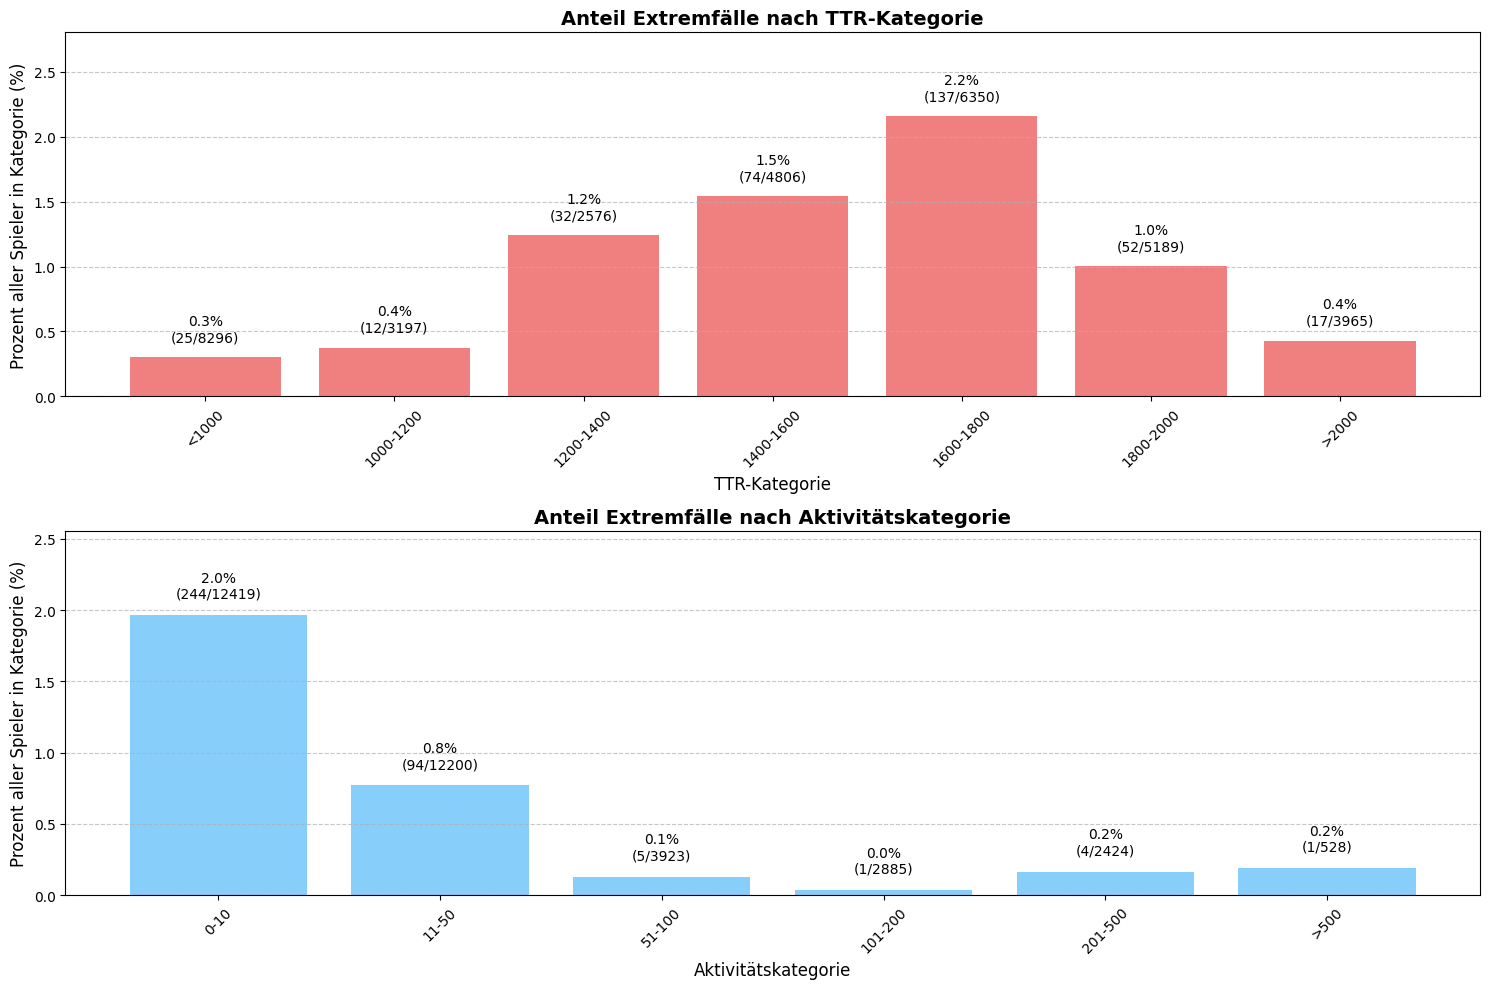

Quartalsverteilung der Extremfälle gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_extremfaelle_nach_quartal.png


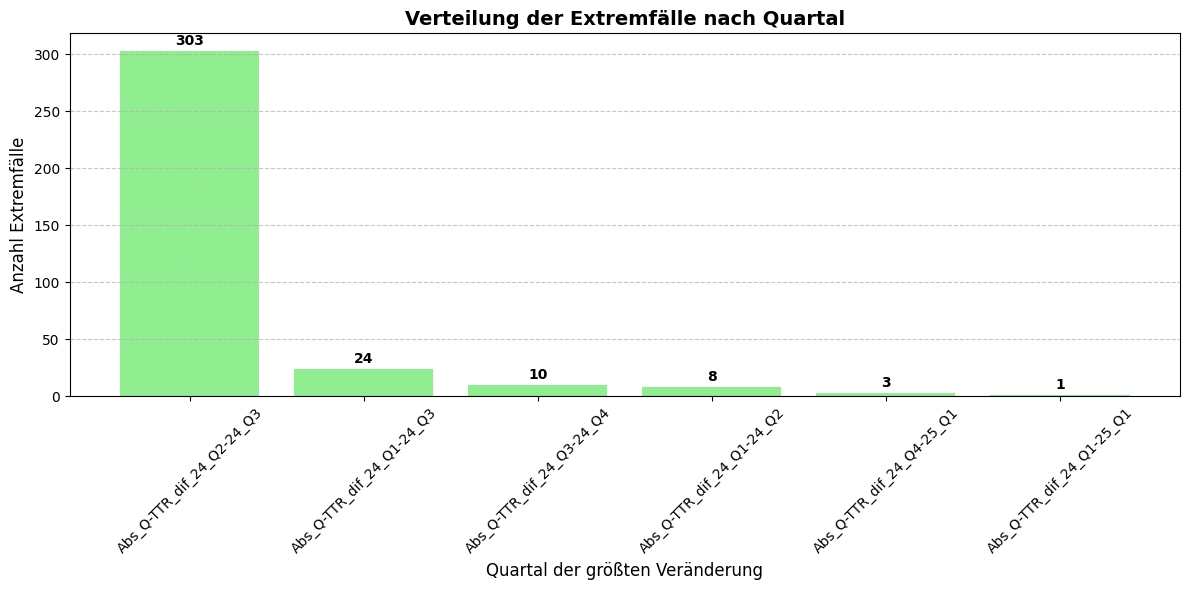

In [51]:
# Charakteristiken der Extremfälle
plt.figure(figsize=(15, 10))

# 1. TTR-Kategorien der Extremfälle
plt.subplot(2, 1, 1)  # Ändere von 2,2,1 zu 2,1,1, um mehr Platz zu nutzen
if 'TTR_Kategorie' in extreme_cases.columns:
    extreme_ttr_counts = extreme_cases['TTR_Kategorie'].value_counts().sort_index()
    total_ttr_counts = df['TTR_Kategorie'].value_counts().sort_index()
    
    # Berechne prozentuale Anteile der Extremfälle pro Kategorie
    pct_extreme = (extreme_ttr_counts / total_ttr_counts * 100)
    
    # Berechne maximalen Prozentwert für die y-Achse mit zusätzlichem Platz
    max_pct = pct_extreme.max() if not pct_extreme.empty else 0
    y_max = max_pct * 1.3  # 30% mehr Platz über dem höchsten Balken
    
    plt.bar(pct_extreme.index, pct_extreme.values, color='lightcoral')
    plt.title('Anteil Extremfälle nach TTR-Kategorie', fontsize=14, fontweight='bold')
    plt.xlabel('TTR-Kategorie', fontsize=12)
    plt.ylabel('Prozent aller Spieler in Kategorie (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.ylim(0, y_max)  # Setze ein festes y-Limit
    
    # Füge Werte und absolute Anzahlen hinzu
    for i, (pct, count) in enumerate(zip(pct_extreme, extreme_ttr_counts)):
        plt.text(i, pct + 0.1, f'{pct:.1f}%\n({count}/{total_ttr_counts.iloc[i]})', 
                 ha='center', va='bottom', fontsize=10)

# 2. Aktivitätskategorien der Extremfälle
plt.subplot(2, 1, 2)  # Ändere von 2,2,2 zu 2,1,2
if 'Aktivitätskategorie' in extreme_cases.columns:
    extreme_activity_counts = extreme_cases['Aktivitätskategorie'].value_counts().sort_index()
    total_activity_counts = df['Aktivitätskategorie'].value_counts().sort_index()
    
    # Berechne prozentuale Anteile der Extremfälle pro Kategorie
    pct_extreme = (extreme_activity_counts / total_activity_counts * 100)
    
    # Berechne maximalen Prozentwert für die y-Achse mit zusätzlichem Platz
    max_pct = pct_extreme.max() if not pct_extreme.empty else 0
    y_max = max_pct * 1.3  # 30% mehr Platz über dem höchsten Balken
    
    plt.bar(pct_extreme.index, pct_extreme.values, color='lightskyblue')
    plt.title('Anteil Extremfälle nach Aktivitätskategorie', fontsize=14, fontweight='bold')
    plt.xlabel('Aktivitätskategorie', fontsize=12)
    plt.ylabel('Prozent aller Spieler in Kategorie (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.ylim(0, y_max)  # Setze ein festes y-Limit
    
    # Füge Werte und absolute Anzahlen hinzu
    for i, (pct, count) in enumerate(zip(pct_extreme, extreme_activity_counts)):
        plt.text(i, pct + 0.1, f'{pct:.1f}%\n({count}/{total_activity_counts.iloc[i]})', 
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
extremfaelle_plot_path = os.path.join(output_path, 'qttr_extremfaelle_analyse_ttr_aktivitaet.png')
plt.savefig(extremfaelle_plot_path, dpi=300)
print(f"TTR und Aktivitätsanalyse der Extremfälle gespeichert unter: {extremfaelle_plot_path}")
plt.show()

# Separate Visualisierung für die Quartalsverteilung
plt.figure(figsize=(12, 6))
extreme_quarter_counts = extreme_cases['Biggest_Change_Col'].value_counts()
plt.bar(extreme_quarter_counts.index, extreme_quarter_counts.values, color='lightgreen')
plt.title('Verteilung der Extremfälle nach Quartal', fontsize=14, fontweight='bold')
plt.xlabel('Quartal der größten Veränderung', fontsize=12)
plt.ylabel('Anzahl Extremfälle', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Füge Anzahl über den Balken hinzu
for i, count in enumerate(extreme_quarter_counts):
    plt.text(i, count + 5, str(count), ha='center', fontweight='bold')

plt.tight_layout()
quartal_plot_path = os.path.join(output_path, 'qttr_extremfaelle_nach_quartal.png')
plt.savefig(quartal_plot_path, dpi=300)
print(f"Quartalsverteilung der Extremfälle gespeichert unter: {quartal_plot_path}")
plt.show()

### Zusammenfassung der Extremfälle in tabellarischer Form

In [50]:
# Ergebnisse in tabellarischer Form für Präsentation
# Zusammenfassung der Charakteristiken von Extremfällen
summary_data = {
    'Kategorie': ['Gesamtanzahl', 'Durchschnittliche Veränderung', 'Median Veränderung', 
                 'Anteil Verbesserungen', 'Anteil Verschlechterungen', 'Häufigstes Quartal'],
    'Wert': [
        len(extreme_cases),
        extreme_cases['Max_Abs_Change'].mean(),
        extreme_cases['Max_Abs_Change'].median(),
        (extreme_cases['Change_Type'] == 'Verbesserung').mean() * 100 if 'Change_Type' in extreme_cases.columns else np.nan,
        (extreme_cases['Change_Type'] == 'Verschlechterung').mean() * 100 if 'Change_Type' in extreme_cases.columns else np.nan,
        extreme_cases['Biggest_Change_Col'].value_counts().index[0] if len(extreme_cases['Biggest_Change_Col'].value_counts()) > 0 else 'N/A'
    ]
}

# Füge weitere Charakteristiken hinzu, falls die Daten vorhanden sind
if 'TTR_Kategorie' in extreme_cases.columns:
    summary_data['Kategorie'].append('Häufigste TTR-Kategorie')
    summary_data['Wert'].append(extreme_cases['TTR_Kategorie'].value_counts().index[0] if len(extreme_cases['TTR_Kategorie'].value_counts()) > 0 else 'N/A')

if 'Aktivitätskategorie' in extreme_cases.columns:
    summary_data['Kategorie'].append('Häufigste Aktivitätskategorie')
    summary_data['Wert'].append(extreme_cases['Aktivitätskategorie'].value_counts().index[0] if len(extreme_cases['Aktivitätskategorie'].value_counts()) > 0 else 'N/A')

if 'Altersgruppe' in extreme_cases.columns:
    summary_data['Kategorie'].append('Häufigste Altersgruppe')
    summary_data['Wert'].append(extreme_cases['Altersgruppe'].value_counts().index[0] if len(extreme_cases['Altersgruppe'].value_counts()) > 0 else 'N/A')

summary_df = pd.DataFrame(summary_data)

# Formatiere die Werte
summary_df.loc[summary_df['Kategorie'] == 'Durchschnittliche Veränderung', 'Wert'] = f"{summary_df.loc[summary_df['Kategorie'] == 'Durchschnittliche Veränderung', 'Wert'].values[0]:.2f} Punkte"
summary_df.loc[summary_df['Kategorie'] == 'Median Veränderung', 'Wert'] = f"{summary_df.loc[summary_df['Kategorie'] == 'Median Veränderung', 'Wert'].values[0]:.2f} Punkte"
summary_df.loc[summary_df['Kategorie'] == 'Anteil Verbesserungen', 'Wert'] = f"{summary_df.loc[summary_df['Kategorie'] == 'Anteil Verbesserungen', 'Wert'].values[0]:.1f}%"
summary_df.loc[summary_df['Kategorie'] == 'Anteil Verschlechterungen', 'Wert'] = f"{summary_df.loc[summary_df['Kategorie'] == 'Anteil Verschlechterungen', 'Wert'].values[0]:.1f}%"

# Speichere die Zusammenfassung
summary_path = os.path.join(output_path, 'qttr_extremfaelle_zusammenfassung.csv')
summary_df.to_csv(summary_path, index=False)
print(f"Zusammenfassung der Extremfälle gespeichert unter: {summary_path}")
print("\nAnalyse der Extremfälle abgeschlossen!")

Zusammenfassung der Extremfälle gespeichert unter: /Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai/qttr_extremfaelle_zusammenfassung.csv

Analyse der Extremfälle abgeschlossen!


Datenprüfung:
Anzahl Datensätze: 300

Verteilung der Zeiträume:
Zeitraum
Q-TTR_dif_24_Q1-25_Q1    283
Q-TTR_dif_24_Q2-24_Q3     15
Q-TTR_dif_24_Q1-24_Q2      2
Name: count, dtype: int64

Statistiken zur QTTR-Veränderung nach Zeitraum:
                       count        mean    min    max
Zeitraum                                              
Q-TTR_dif_24_Q1-24_Q2      2 -204.000000 -231.0 -177.0
Q-TTR_dif_24_Q1-25_Q1    283  154.657244 -611.0  493.0
Q-TTR_dif_24_Q2-24_Q3     15  162.133333 -199.0  250.0

Verteilung von Verbesserungen/Verschlechterungen nach Zeitraum:
Change_Type            Verbesserung  Verschlechterung
Zeitraum                                             
Q-TTR_dif_24_Q1-24_Q2             0                 2
Q-TTR_dif_24_Q1-25_Q1           260                23
Q-TTR_dif_24_Q2-24_Q3            14                 1

Prozentuale Verteilung:
Change_Type            Verbesserung  Verschlechterung
Zeitraum                                             
Q-TTR_dif_24_Q1-24_Q2 

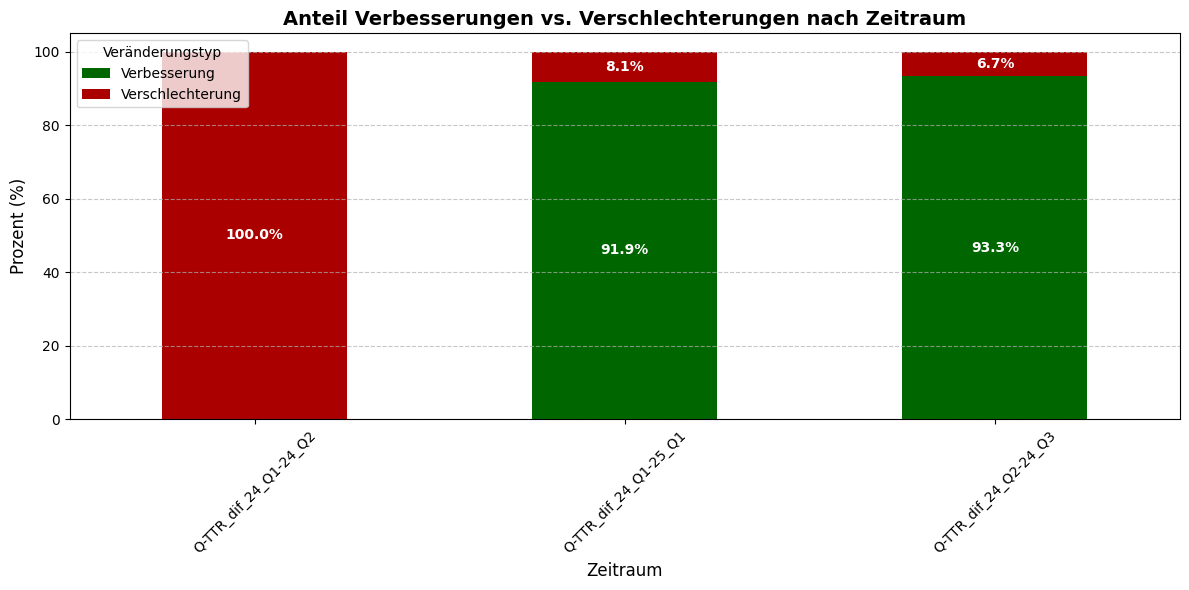


Plausibilitätsprüfung der Daten:
AUFFÄLLIG: Im Zeitraum Q-TTR_dif_24_Q1-24_Q2 sind 100% der Veränderungen von einem Typ (Verschlechterung)!
Spannweite des Verbesserungsanteils: 93.3 Prozentpunkte
AUFFÄLLIG: Sehr große Unterschiede im Anteil der Verbesserungen zwischen Zeiträumen!

ANOVA-Test für Unterschiede zwischen Zeiträumen:
F-Wert: 0.1171
p-Wert: 0.8895
Signifikante Unterschiede zwischen Zeiträumen: NEIN


In [55]:
# Definiere den Pfad für die Speicherung der Grafiken
output_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/Darstellungen_Kai'
os.makedirs(output_path, exist_ok=True)

# Lade die neue CSV-Datei mit den QTTR-Veränderungen
csv_path = '/Users/kaihufnagel/Documents/BBA/6. Semester/BA Projekt I/QTTR-Veraenderungen-Klemm/Data_Analysis/300_größten_änderungen.csv'
df_changes = pd.read_csv(csv_path)

# Prüfen der Daten auf Plausibilität
print("Datenprüfung:")
print(f"Anzahl Datensätze: {len(df_changes)}")
print("\nVerteilung der Zeiträume:")
print(df_changes['Zeitraum'].value_counts())

print("\nStatistiken zur QTTR-Veränderung nach Zeitraum:")
zeitraum_stats = df_changes.groupby('Zeitraum')['QTTR-Veränderung'].agg(['count', 'mean', 'min', 'max'])
print(zeitraum_stats)

# Klassifiziere als Verbesserung oder Verschlechterung basierend auf der QTTR-Veränderung
df_changes['Change_Type'] = 'Stabil'
df_changes.loc[df_changes['QTTR-Veränderung'] > 0, 'Change_Type'] = 'Verbesserung'
df_changes.loc[df_changes['QTTR-Veränderung'] < 0, 'Change_Type'] = 'Verschlechterung'

# Prüfe die Verteilung von Verbesserungen und Verschlechterungen nach Zeitraum
print("\nVerteilung von Verbesserungen/Verschlechterungen nach Zeitraum:")
direction_by_period = pd.crosstab(df_changes['Zeitraum'], df_changes['Change_Type'])
print(direction_by_period)

# Berechne Prozentsätze
direction_pct = pd.crosstab(df_changes['Zeitraum'], df_changes['Change_Type'], normalize='index') * 100
print("\nProzentuale Verteilung:")
print(direction_pct)

# Plotte nur das gestapelte Balkendiagramm für die Anteile
plt.figure(figsize=(12, 6))

# Kreuztabelle erstellen
period_change_cross = pd.crosstab(df_changes['Zeitraum'], df_changes['Change_Type'], normalize='index') * 100

# Falls 'Stabil' vorhanden ist, entferne es für eine klarere Darstellung
if 'Stabil' in period_change_cross.columns:
    period_change_cross = period_change_cross[['Verbesserung', 'Verschlechterung']]

# Sortiere die Zeiträume in chronologischer Reihenfolge falls nötig
# Definiere die chronologische Reihenfolge basierend auf den verfügbaren Daten
if all(x in period_change_cross.index for x in ['QTTR_dif_24_Q1-24_Q2', 'QTTR_dif_24_Q2-24_Q3', 'QTTR_dif_24_Q3-24_Q4', 'QTTR_dif_24_Q4-25_Q1']):
    period_order = ['QTTR_dif_24_Q1-24_Q2', 'QTTR_dif_24_Q2-24_Q3', 'QTTR_dif_24_Q3-24_Q4', 'QTTR_dif_24_Q4-25_Q1']
    period_change_cross = period_change_cross.reindex(period_order)

# Farben tauschen: Grün für Verbesserungen und Rot für Verschlechterungen
colors = {'Verbesserung': '#006600', 'Verschlechterung': '#AA0000'}  # Dunkelgrün und Dunkelrot

# Plotte gestapeltes Balkendiagramm mit getauschten Farben
period_change_cross.plot(kind='bar', stacked=True, color=[colors.get(x, '#AAAAAA') for x in period_change_cross.columns], ax=plt.gca())

plt.title('Anteil Verbesserungen vs. Verschlechterungen nach Zeitraum', fontsize=14, fontweight='bold')
plt.xlabel('Zeitraum', fontsize=12)
plt.ylabel('Prozent (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Veränderungstyp')
plt.xticks(rotation=45)

# Füge Prozentsätze hinzu
for i, period in enumerate(period_change_cross.index):
    for j, column in enumerate(period_change_cross.columns):
        # Berechne Position (je nachdem, ob gestapelt oder nicht)
        if j == 0:  # Erste Kategorie
            position = period_change_cross.loc[period, column] / 2
        else:  # Weitere Kategorien - finde Position in der Mitte des Segments
            previous_sum = period_change_cross.loc[period, :].iloc[:j].sum()
            current_val = period_change_cross.loc[period, column]
            position = previous_sum + current_val / 2
            
        # Formatierung der Prozentsätze mit einer Nachkommastelle
        value_text = f'{period_change_cross.loc[period, column]:.1f}%'
        
        # Füge Prozentsätze hinzu, wenn Wert über 5%
        if period_change_cross.loc[period, column] > 5:
            plt.text(i, position, value_text, 
                    ha='center', va='center', fontweight='bold',
                    color='white')  # Weißer Text für bessere Lesbarkeit

# Überprüfung der Plausibilität - Summe sollte 100% sein
for idx in period_change_cross.index:
    row_sum = period_change_cross.loc[idx].sum()
    if abs(row_sum - 100) > 0.1:  # Toleranz für Rundungsfehler
        print(f"WARNUNG: Summe für {idx} beträgt {row_sum:.1f}%, nicht 100%!")

plt.tight_layout()
zeitraum_path = os.path.join(output_path, 'qttr_veraenderungen_prozent_nach_zeitraum.png')
plt.savefig(zeitraum_path, dpi=300)
print(f"\nGrafik gespeichert unter: {zeitraum_path}")
plt.show()

# Zusätzliche Plausibilitätsprüfung
print("\nPlausibilitätsprüfung der Daten:")

# 1. Prüfe auf ein starkes Ungleichgewicht (z.B. 100% in einer Kategorie)
for period, row in period_change_cross.iterrows():
    if row.max() == 100:
        print(f"AUFFÄLLIG: Im Zeitraum {period} sind 100% der Veränderungen von einem Typ ({row.idxmax()})!")

# 2. Prüfe auf extreme Unterschiede zwischen Zeiträumen
if len(period_change_cross) >= 2:
    improvement_range = period_change_cross['Verbesserung'].max() - period_change_cross['Verbesserung'].min()
    print(f"Spannweite des Verbesserungsanteils: {improvement_range:.1f} Prozentpunkte")
    if improvement_range > 80:
        print("AUFFÄLLIG: Sehr große Unterschiede im Anteil der Verbesserungen zwischen Zeiträumen!")

# 3. ANOVA-Test für Unterschiede zwischen Zeiträumen, falls entsprechende Daten vorhanden
if 'QTTR-Veränderung (absolut)' in df_changes.columns:
    from scipy.stats import f_oneway
    
    period_data = [df_changes[df_changes['Zeitraum'] == period]['QTTR-Veränderung (absolut)'].dropna() 
                 for period in df_changes['Zeitraum'].unique()]
    
    if all(len(data) > 0 for data in period_data) and len(period_data) > 1:
        anova_result = f_oneway(*period_data)
        print("\nANOVA-Test für Unterschiede zwischen Zeiträumen:")
        print(f"F-Wert: {anova_result.statistic:.4f}")
        print(f"p-Wert: {anova_result.pvalue:.4f}")
        print(f"Signifikante Unterschiede zwischen Zeiträumen: {'JA' if anova_result.pvalue < 0.05 else 'NEIN'}")